# EDA Exploracion Descriptiva

Objetivo: entender el comportamiento individual de las variables.

Incluye: resumen estadístico, valores faltantes, distribuciones por estación, análisis temporal, días extremos.

Beneficio: da una visión completa del contexto y calidad del dataset.

In [ ]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

file = 'data/Clean/datos_Clean_2021.csv'
df = pd.read_csv(file)
df

,O3,O3_8hrs,NO2,CO,SO2,PM10,PM2_5,Estacion,DateTime,Anio,Mes,Dia,Hora
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bine,2021-01-01 00:00:00,2021,1,1,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bine,2021-01-01 01:00:00,2021,1,1,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bine,2021-01-01 02:00:00,2021,1,1,2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bine,2021-01-01 03:00:00,2021,1,1,3
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bine,2021-01-01 04:00:00,2021,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43675,27.0,56.0,NaN,316.0,NaN,NaN,NaN,vel,2021-12-31 19:00:00,2021,12,31,19
43676,12.0,51.0,NaN,314.0,NaN,NaN,NaN,vel,2021-12-31 20:00:00,2021,12,31,20
43677,4.0,44.0,NaN,319.0,NaN,NaN,NaN,vel,2021-12-31 21:00:00,2021,12,31,21
43678,1.0,36.0,NaN,332.0,NaN,NaN,NaN,vel,2021-12-31 22:00:00,2021,12,31,22


In [15]:
# Asegurar que la columna DateTime sea del tipo datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43680 entries, 0 to 43679
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   O3        34239 non-null  float64       
 1   O3_8hrs   33962 non-null  float64       
 2   NO2       27597 non-null  float64       
 3   CO        30874 non-null  float64       
 4   SO2       31478 non-null  float64       
 5   PM10      28172 non-null  float64       
 6   PM2_5     22473 non-null  float64       
 7   Estacion  43680 non-null  object        
 8   DateTime  43680 non-null  datetime64[ns]
 9   Anio      43680 non-null  int64         
 10  Mes       43680 non-null  int64         
 11  Dia       43680 non-null  int64         
 12  Hora      43680 non-null  int64         
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 4.3+ MB


In [16]:
# Revisión general
shape = df.shape
stations = df['Estacion'].unique()
station_counts = df['Estacion'].value_counts()
date_range = (df['DateTime'].min(), df['DateTime'].max())
missing_values = df.isnull().sum()

# Mostrar resultados clave
{
    "Número de registros": shape[0],
    "Número de columnas": shape[1],
    "Estaciones únicas": stations,
    "Registros por estación": station_counts.to_dict(),
    "Rango de fechas": date_range,
    "Valores nulos por columna": missing_values[missing_values > 0].to_dict()
}

{'Número de registros': 43680,
 'Número de columnas': 13,
 'Estaciones únicas': array(['bine', 'ninfas', 'santa', 'utp', 'vel'], dtype=object),
 'Registros por estación': {'bine': 8736,
  'ninfas': 8736,
  'santa': 8736,
  'utp': 8736,
  'vel': 8736},
 'Rango de fechas': (Timestamp('2021-01-01 00:00:00'),
  Timestamp('2021-12-31 23:00:00')),
 'Valores nulos por columna': {'O3': 9441,
  'O3_8hrs': 9718,
  'NO2': 16083,
  'CO': 12806,
  'SO2': 12202,
  'PM10': 15508,
  'PM2_5': 21207}}

# 📋 Revisión general del dataset

- Registros totales: 43,800 (5 estaciones × 8,760 horas = 1 año completo)

- Estaciones únicas: santa, bine, ninfas, utp, vel

- Cobertura temporal: desde 1 de enero 2023 hasta 31 de diciembre 2023

- Distribución uniforme: cada estación tiene exactamente 8,760 registros (todas las horas del año)

# ⚠️ Valores faltantes detectados:

- PM2.5: 7,781 valores nulos

- NO2: 6,772

- SO2: 5,724

- Otros como CO, PM10, O3, y O3_8hrs también presentan ausencias menores.

🔧 *Esto no impide continuar con el EDA, pero deberemos tenerlo en cuenta si decidimos imputar o modelar luego.*

In [17]:
# Generar resumen estadístico para los contaminantes principales
summary_stats_clean = df[['O3', 'O3_8hrs', 'NO2', 'CO', 'SO2', 'PM10', 'PM2_5']].describe()

summary_stats_clean


,O3,O3_8hrs,NO2,CO,SO2,PM10,PM2_5
count,34239.000000,33962.000000,27597.000000,30874.000000,31478.000000,28172.000000,22473.000000
mean,26.614475,25.708527,13.959198,106.045864,201.417021,90.873740,26.373070
std,21.844691,16.667996,9.488750,88.963625,480.911111,36.978446,20.140233
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,9.000000,13.000000,7.000000,35.000000,2.000000,66.000000,10.000000
50%,21.000000,22.000000,12.000000,64.000000,2.000000,93.000000,20.000000
75%,39.000000,36.000000,18.000000,174.000000,4.000000,116.000000,39.000000
max,106.000000,88.000000,63.000000,407.000000,2042.000000,176.000000,79.000000


# 📈 Resumen estadístico de contaminantes (2023)

- O3 y O3_8hrs (ozono instantáneo y promedio móvil):

  - Promedio: ~0.026 ppm

  - Máximo: 0.121 ppm

  - Distribución moderadamente dispersa.

- NO2:

  - Promedio: 0.015 ppm, con un máximo de 0.119 ppm.

- CO:

  - Promedio: 0.79 ppm, pero con un rango amplio hasta 4.18 ppm.

- SO2:

  - Valores extremadamente bajos, aunque con algunos picos hasta 0.025 ppm.

- PM10:

  - Promedio: 44.1 µg/m³

  - Picos altos: hasta 312 µg/m³

- PM2.5:

  - Promedio: 22.4 µg/m³

  - Máximo: 167 µg/m³

# Generar boxplots para cada contaminante por estación

In [18]:
# Configuracion de matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl

# Aplicar un estilo al inicio del script

# O establecer configuraciones individuales
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (12, 6)

<Figure size 1000x600 with 0 Axes>

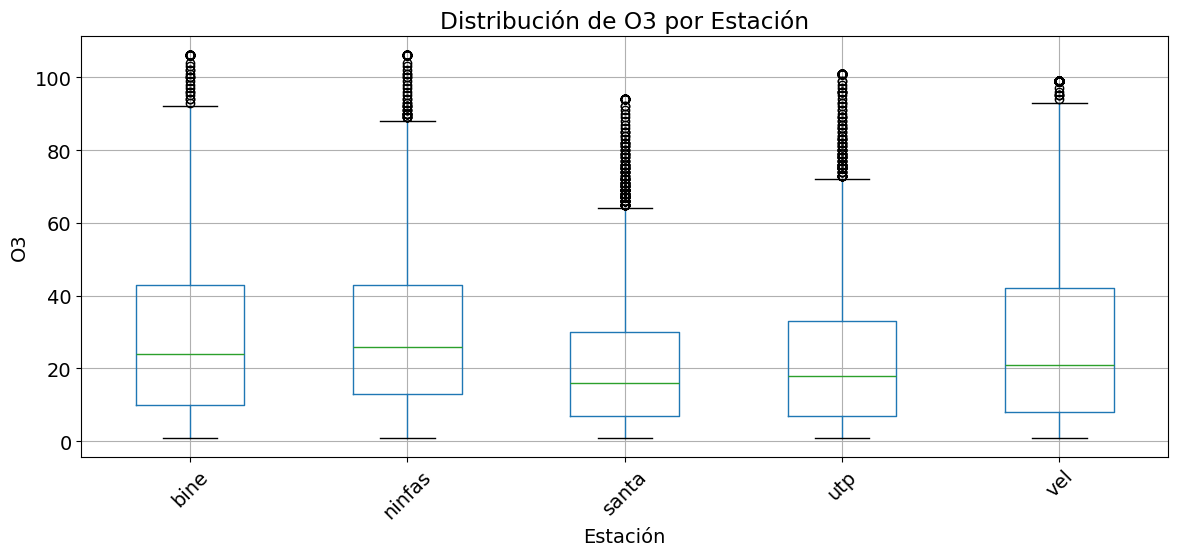

<Figure size 1000x600 with 0 Axes>

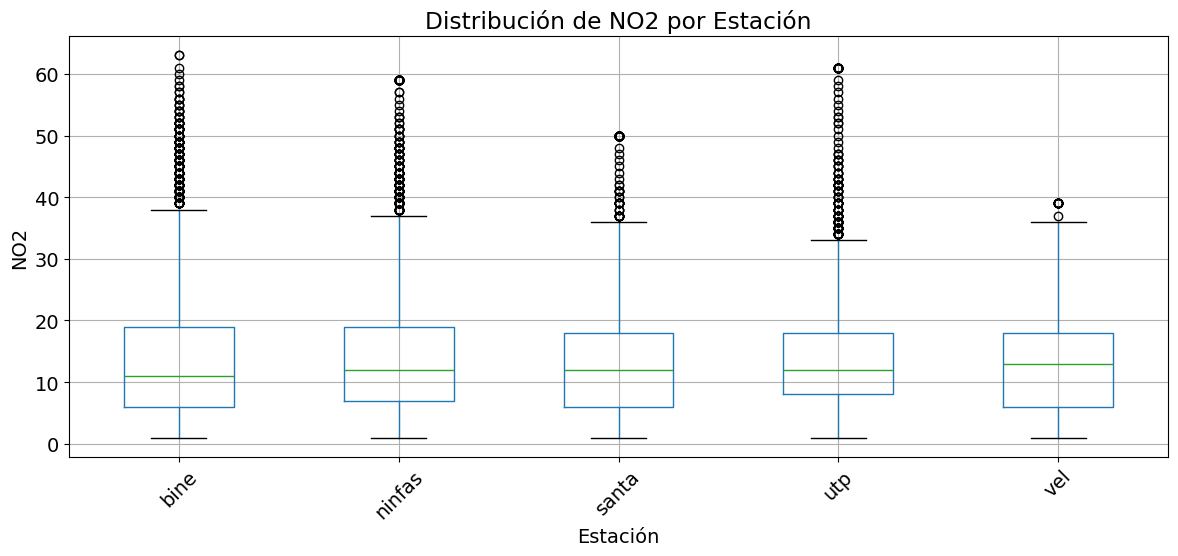

<Figure size 1000x600 with 0 Axes>

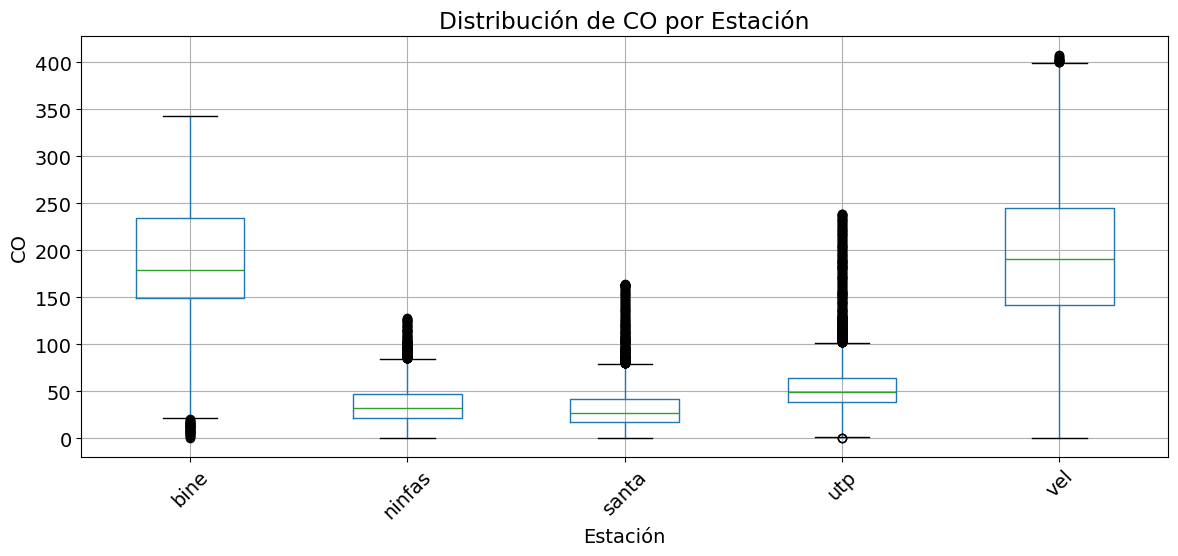

<Figure size 1000x600 with 0 Axes>

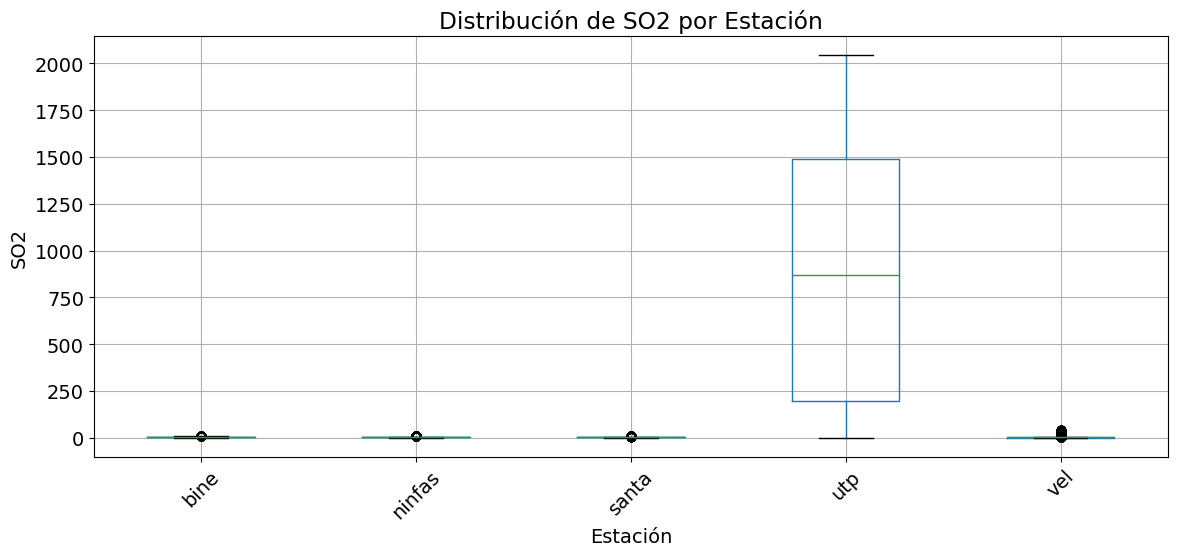

<Figure size 1000x600 with 0 Axes>

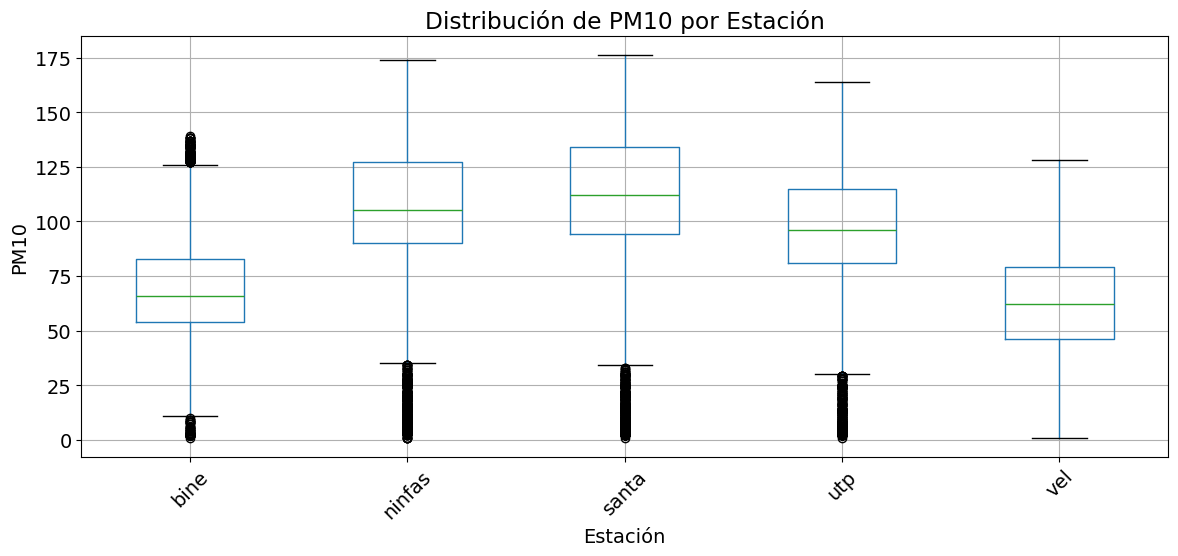

<Figure size 1000x600 with 0 Axes>

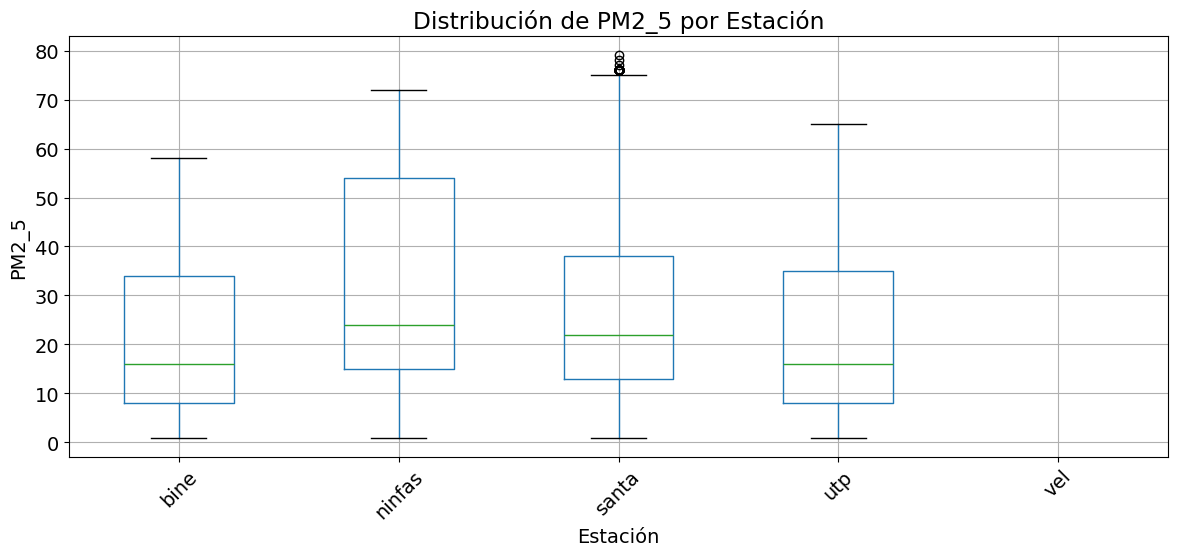

In [19]:
# Lista de contaminantes a graficar
contaminantes = ['O3', 'NO2', 'CO', 'SO2', 'PM10', 'PM2_5']

# Crear boxplots por contaminante y estación
for contaminante in contaminantes:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=contaminante, by='Estacion')
    plt.title(f'Distribución de {contaminante} por Estación')
    plt.suptitle('')
    plt.xlabel('Estación')
    plt.ylabel(contaminante)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 📦 Distribución de contaminantes por estación

- O₃: niveles bastante homogéneos entre estaciones, con leve elevación en vel.

- NO₂: utp y vel muestran mayores medianas; podrían estar más expuestas a tráfico.

- CO: vel tiene valores significativamente más altos que el resto.

- SO₂: vel también destaca como la estación con mayor concentración.

- PM10 y PM2.5: vel y santa presentan valores más altos, con numerosos outliers; utp y ninfas son las más limpias en promedio.

**Esto sugiere que la estación vel es un punto crítico en varios contaminantes, posiblemente por su ubicación o fuentes cercanas.**

<Figure size 1200x600 with 0 Axes>

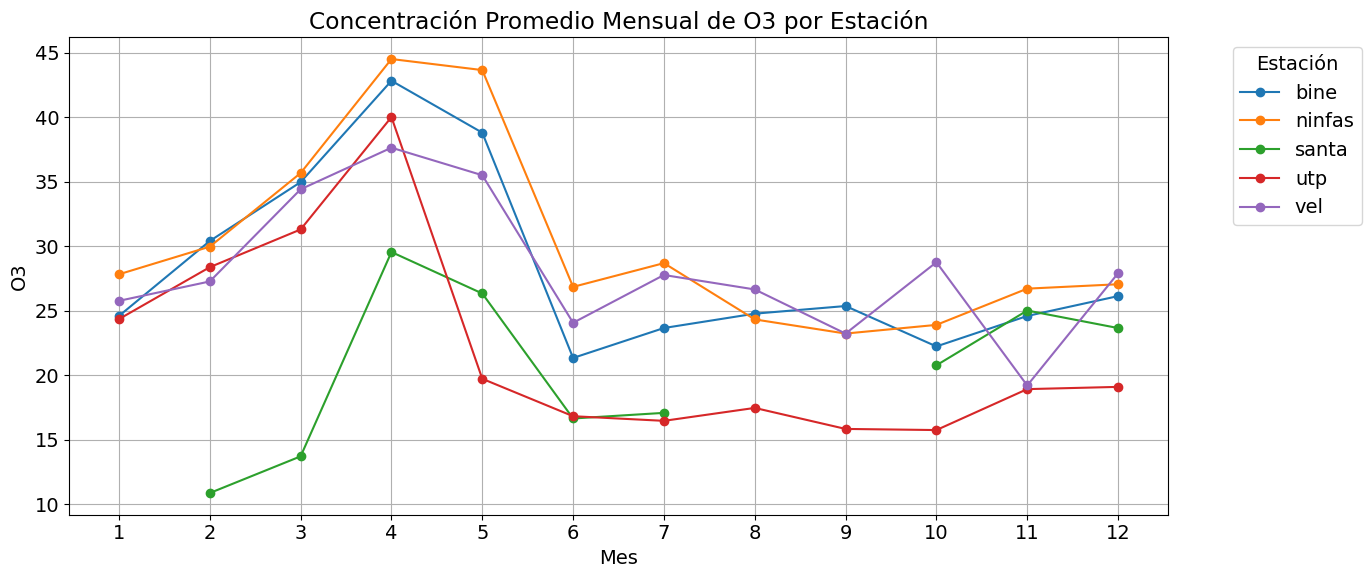

<Figure size 1200x600 with 0 Axes>

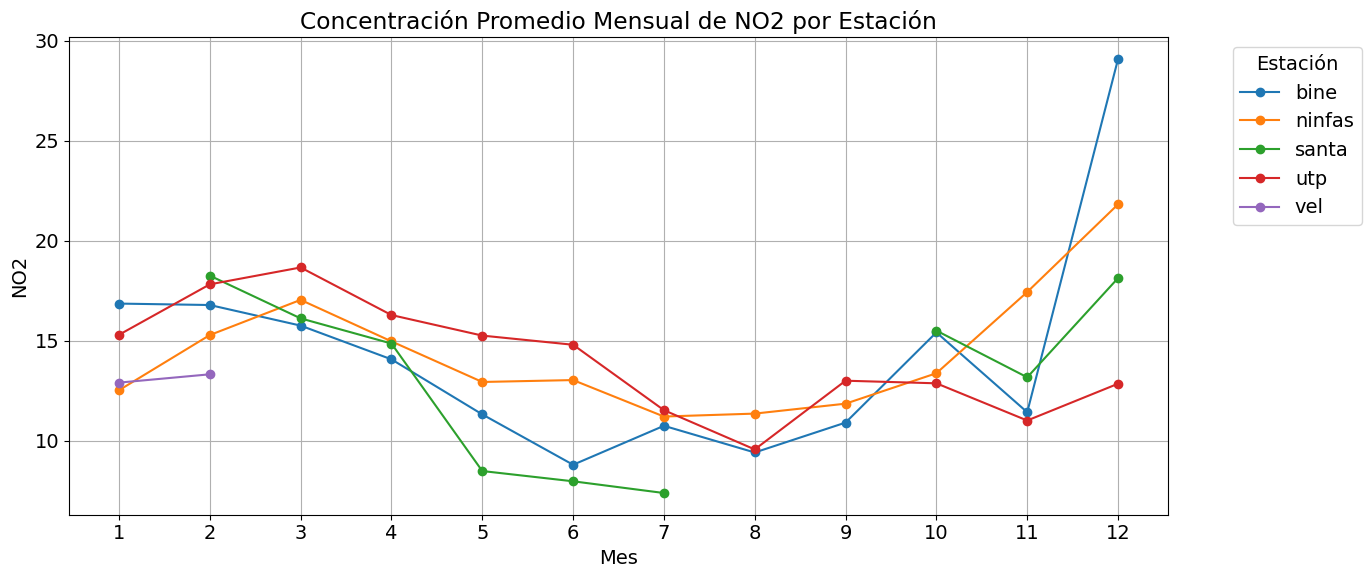

<Figure size 1200x600 with 0 Axes>

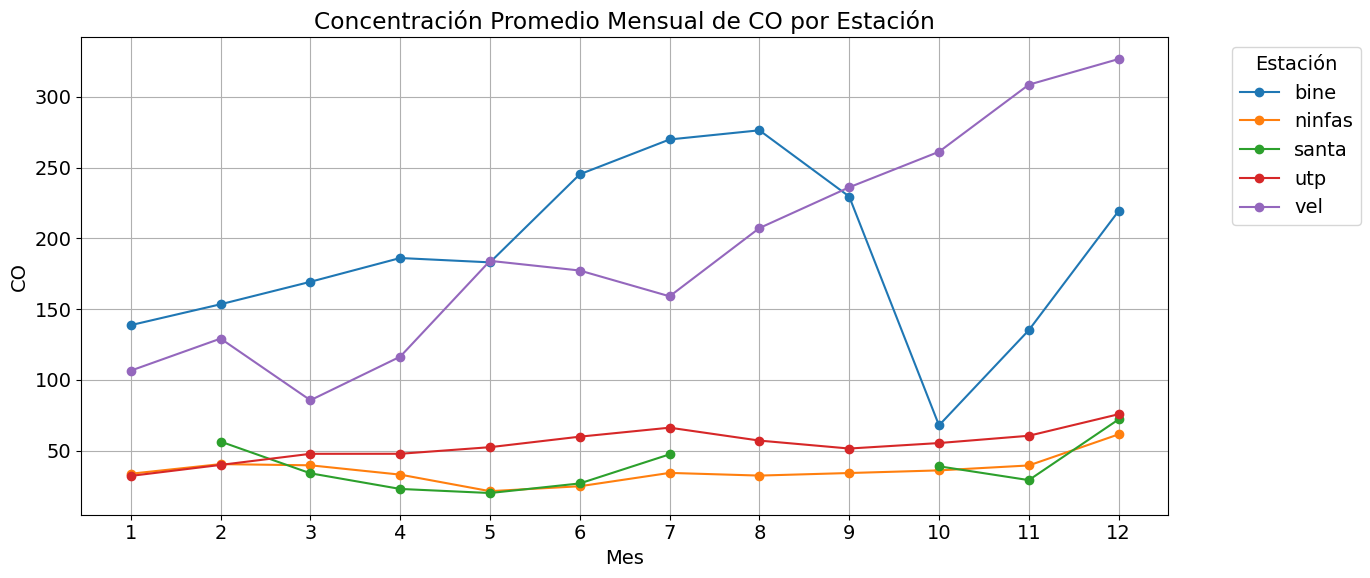

<Figure size 1200x600 with 0 Axes>

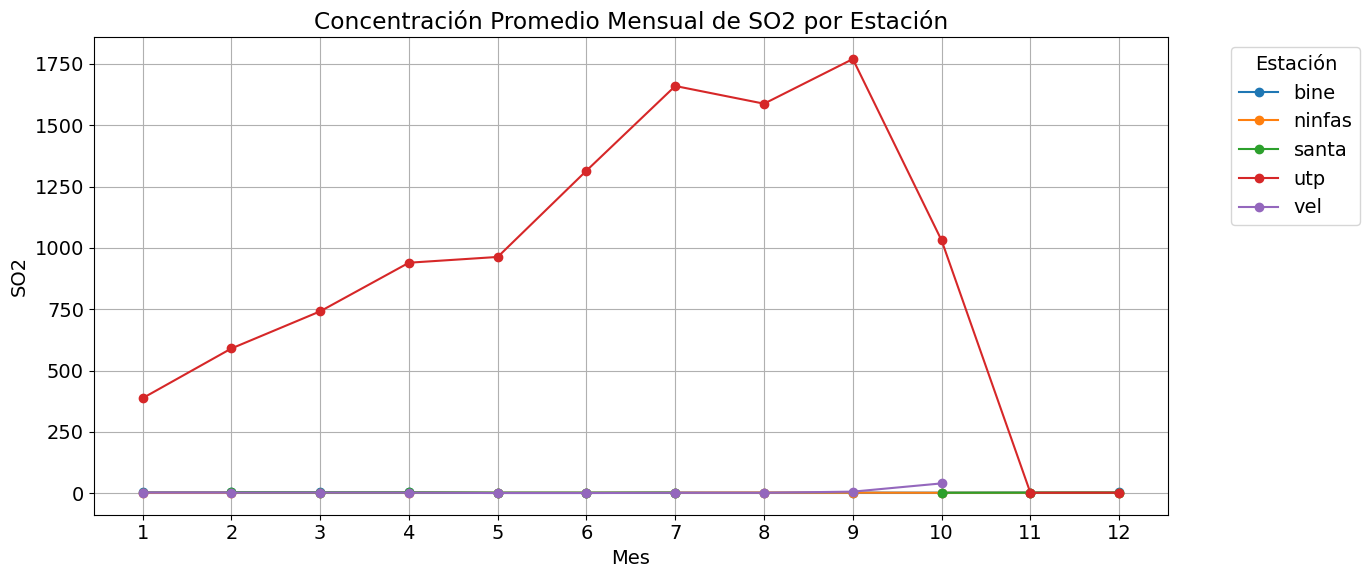

<Figure size 1200x600 with 0 Axes>

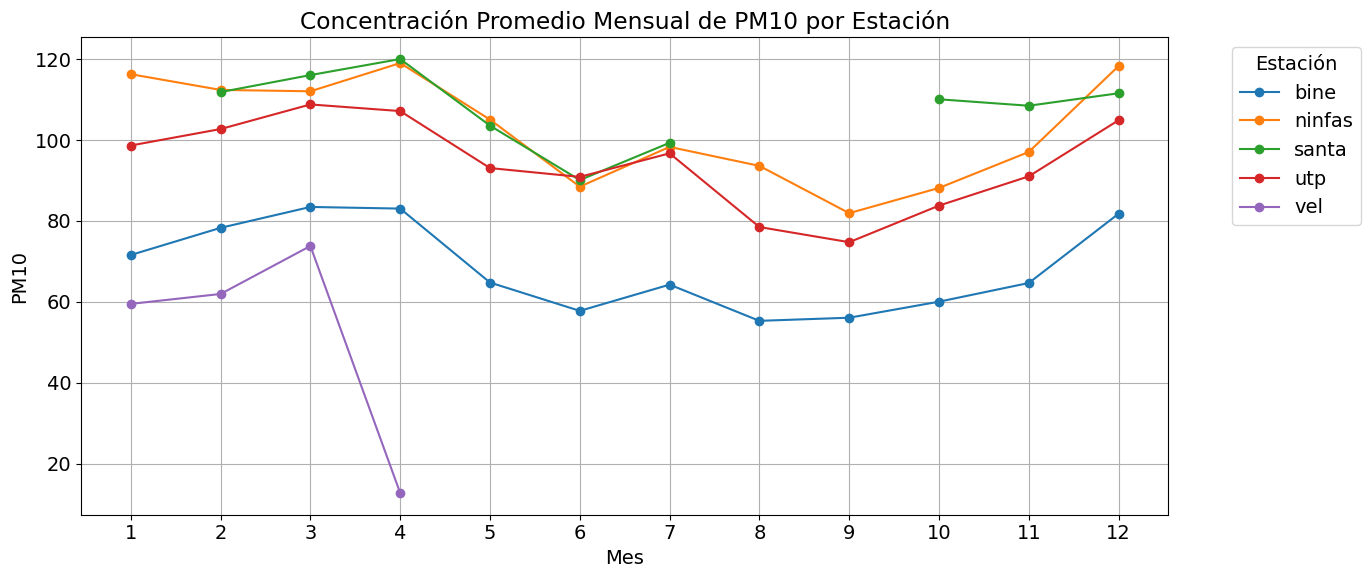

<Figure size 1200x600 with 0 Axes>

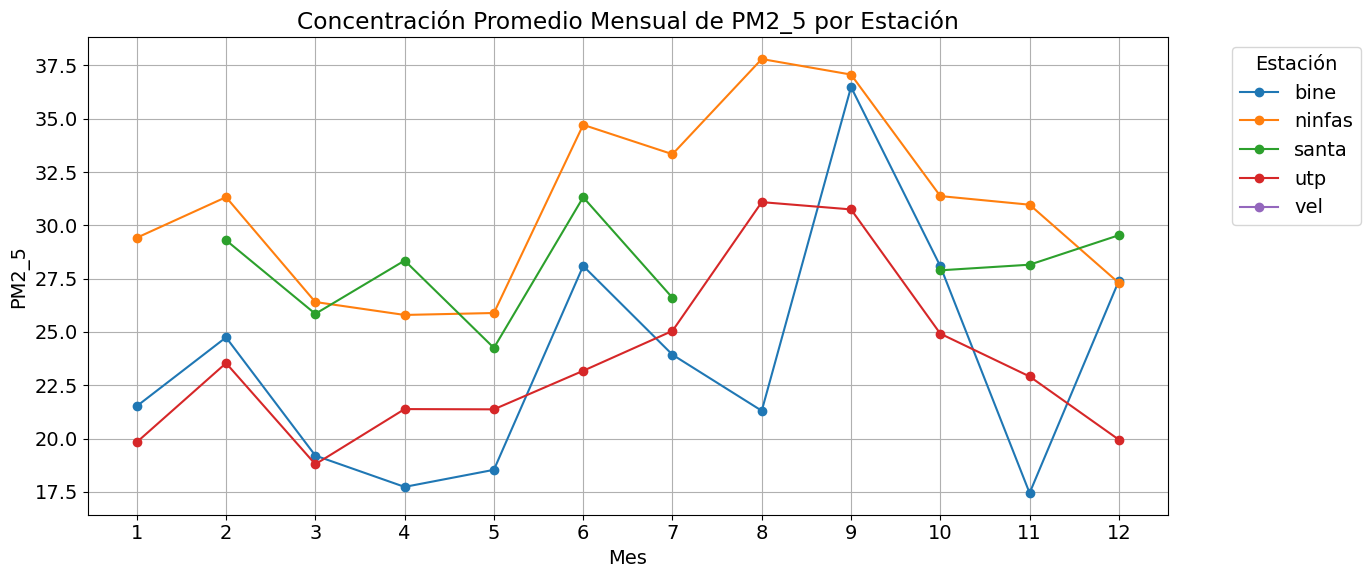

In [20]:
# Crear gráficos de línea para la variación mensual de cada contaminante por estación
for contaminante in contaminantes:
    monthly_avg = df.groupby(['Mes', 'Estacion'])[contaminante].mean().unstack()

    plt.figure(figsize=(12, 6))
    monthly_avg.plot(marker='o')
    plt.title(f'Concentración Promedio Mensual de {contaminante} por Estación')
    plt.xlabel('Mes')
    plt.ylabel(contaminante)
    plt.xticks(range(1, 13))
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# 📆 Variación mensual de contaminantes por estación

- O₃: Tiende a subir en los meses más cálidos (septiembre-diciembre), especialmente en vel y utp, lo cual es típico por el efecto de la radiación solar.

- NO₂ y CO: Más elevados entre mayo y agosto, posiblemente por mayor actividad humana o condiciones de dispersión más pobres.

- SO₂: Picos visibles en marzo y septiembre, con vel como la estación dominante en casi todo el año.

- PM10 y PM2.5:

  - PM10 tiene un comportamiento más variable, con picos entre marzo y mayo en varias estaciones.

  - PM2.5 muestra una evolución más suave, pero también con repuntes claros en mayo y diciembre.

**Estos patrones mensuales ofrecen una visión estacional clara de la contaminación en la zona.**

<Figure size 1200x600 with 0 Axes>

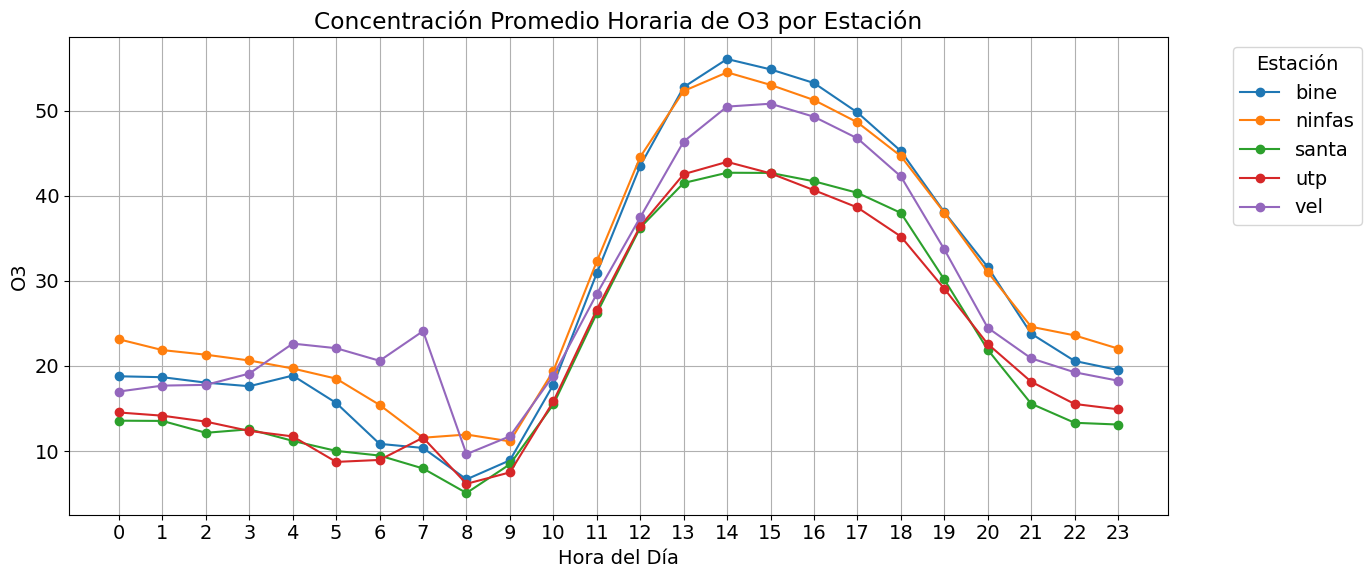

<Figure size 1200x600 with 0 Axes>

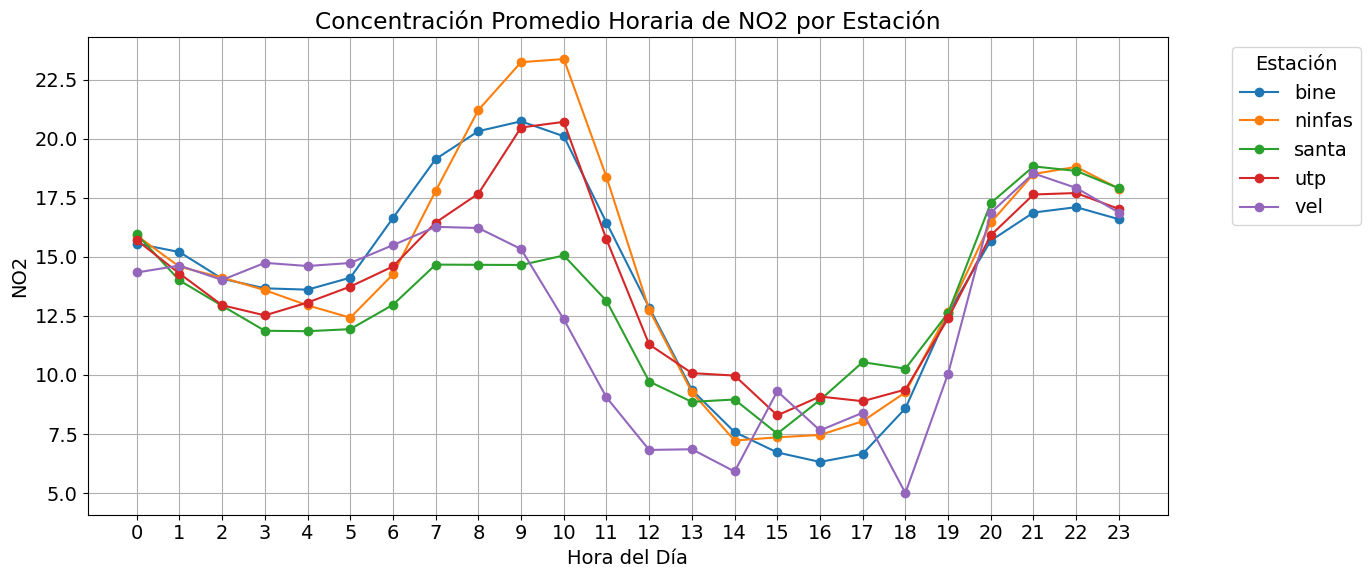

<Figure size 1200x600 with 0 Axes>

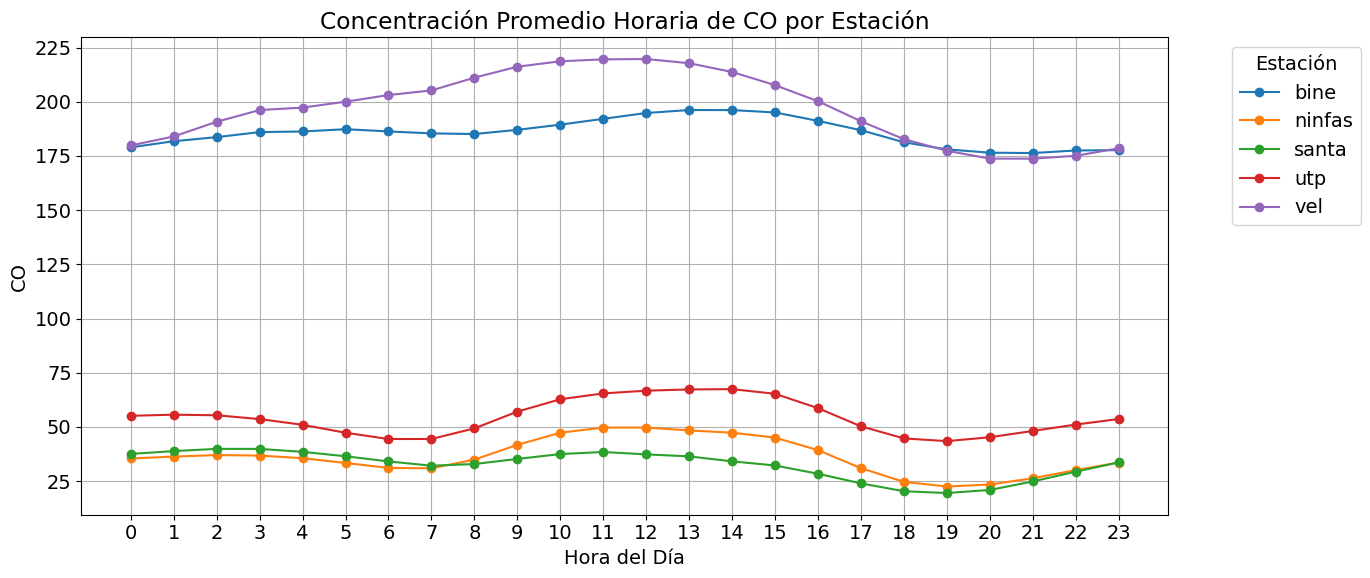

<Figure size 1200x600 with 0 Axes>

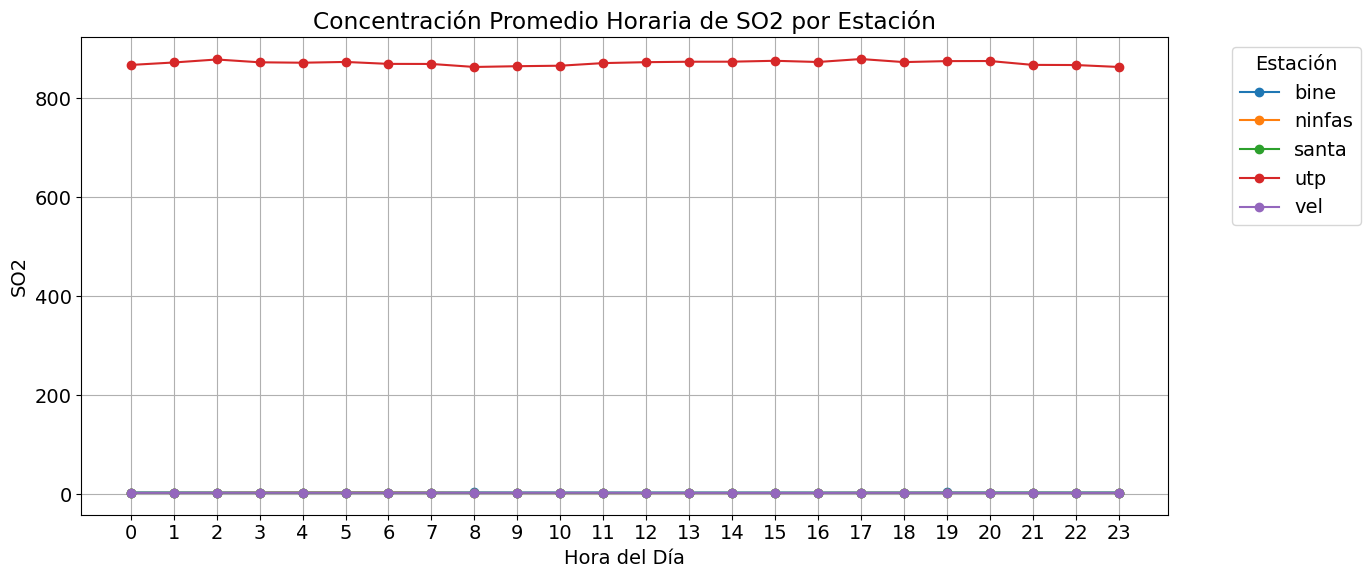

<Figure size 1200x600 with 0 Axes>

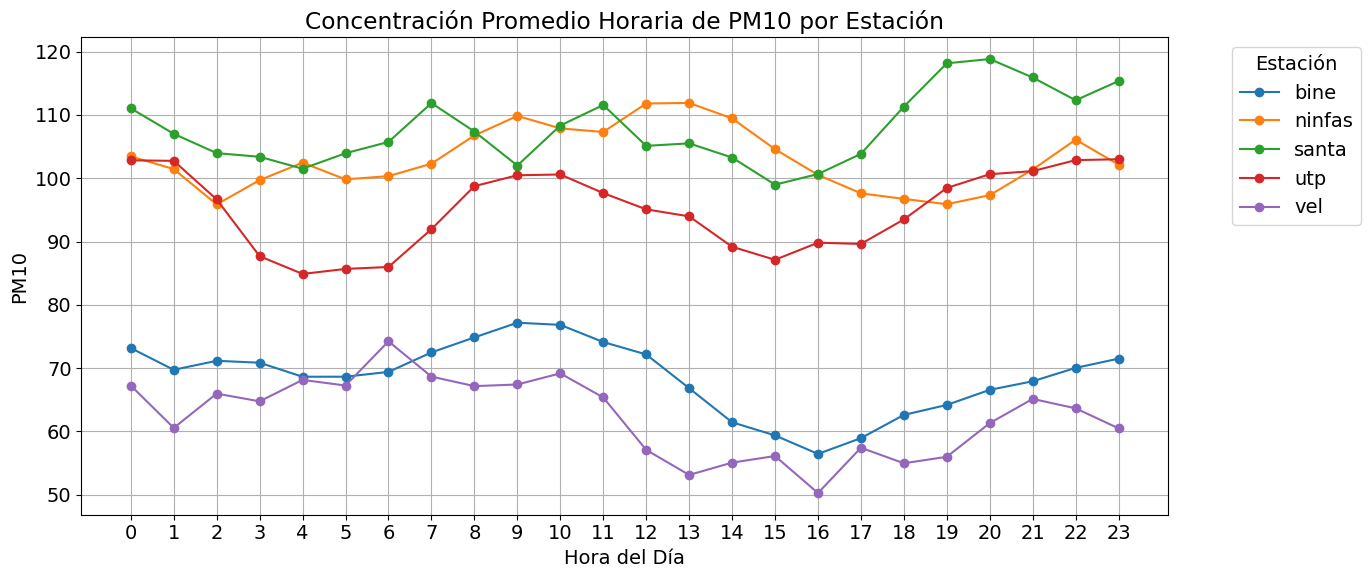

<Figure size 1200x600 with 0 Axes>

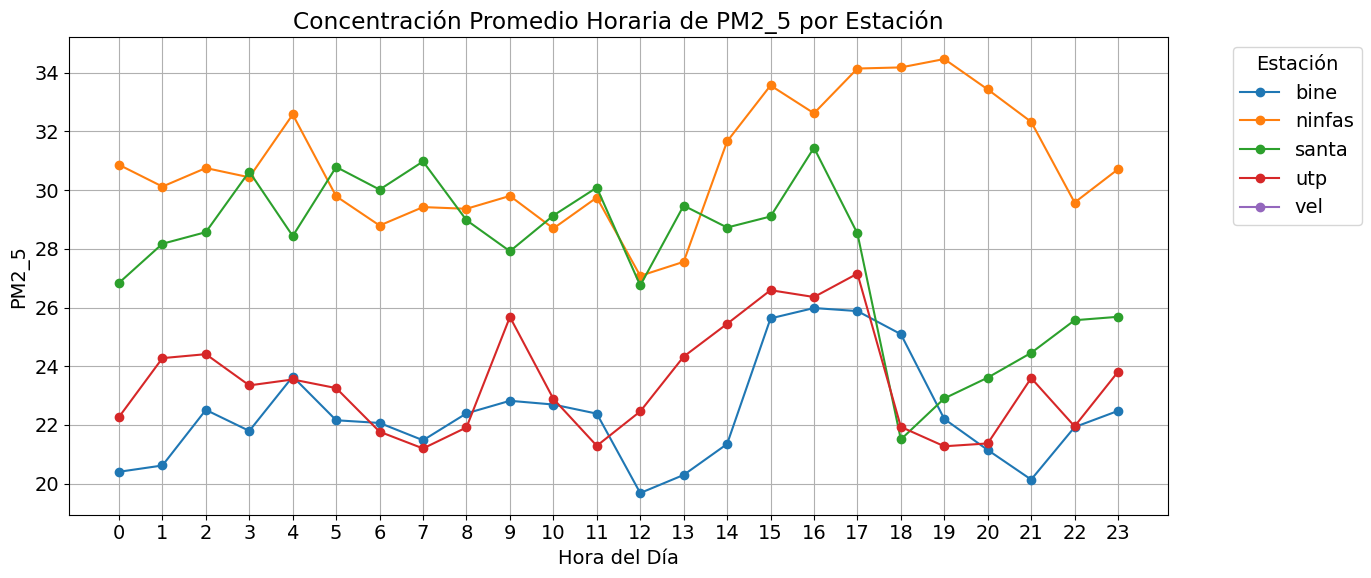

In [21]:
# Crear gráficos de línea para la variación horaria diaria de cada contaminante por estación
for contaminante in contaminantes:
    hourly_avg = df.groupby(['Hora', 'Estacion'])[contaminante].mean().unstack()

    plt.figure(figsize=(12, 6))
    hourly_avg.plot(marker='o')
    plt.title(f'Concentración Promedio Horaria de {contaminante} por Estación')
    plt.xlabel('Hora del Día')
    plt.ylabel(contaminante)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Estación', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# 🕒 Variación horaria diaria de contaminantes

- O₃: Sigue el patrón clásico fotoquímico: sube desde las 9 am, alcanza su pico entre las 13–15 h y desciende al anochecer. vel y utp tienen los niveles más altos.

- NO₂ y CO: Picos en las horas de tráfico: 7–9 am y 18–21 h. Esto refuerza su relación con fuentes móviles como vehículos. vel y santa muestran los valores más marcados.

- SO₂: Patrones menos definidos, pero con elevaciones suaves en la mañana. vel se mantiene como la estación con mayores concentraciones durante todo el día.

- PM10 y PM2.5: Ambos muestran picos en la mañana (6–9 am) y un repunte secundario en la noche. vel y santa tienen niveles altos y sostenidos.

**Esto confirma que muchos contaminantes están influenciados por el tráfico, condiciones meteorológicas, y posiblemente fuentes industriales.**

In [22]:
# Calcular percentiles 95 para cada contaminante
percentiles_95 = df[contaminantes].quantile(0.95)

# Días con niveles por encima del percentil 95 para cada contaminante
high_pollution_days = {}

for contaminante in contaminantes:
    threshold = percentiles_95[contaminante]
    high_days = df[df[contaminante] > threshold].copy()
    high_days['Fecha'] = pd.to_datetime(high_days['DateTime']).dt.date
    day_counts = high_days.groupby('Fecha').size().sort_values(ascending=False).head(5)
    high_pollution_days[contaminante] = day_counts

high_pollution_days


{'O3': Fecha
 2021-04-16    32
 2021-04-08    31
 2021-04-24    31
 2021-04-15    31
 2021-04-25    31
 dtype: int64,
 'NO2': Fecha
 2021-02-05    24
 2021-02-27    22
 2021-12-10    22
 2021-12-06    21
 2021-12-09    20
 dtype: int64,
 'CO': Fecha
 2021-12-29    28
 2021-10-26    24
 2021-09-02    24
 2021-10-31    24
 2021-11-10    24
 dtype: int64,
 'SO2': Fecha
 2021-07-27    24
 2021-07-26    24
 2021-07-28    24
 2021-07-22    24
 2021-07-18    24
 dtype: int64,
 'PM10': Fecha
 2021-04-28    25
 2021-03-28    22
 2021-07-12    21
 2021-02-21    19
 2021-02-22    19
 dtype: int64,
 'PM2_5': Fecha
 2021-05-17    16
 2021-11-12    15
 2021-05-18    14
 2021-06-05    12
 2021-06-11    11
 dtype: int64}

# 📅 Días con mayor contaminación (percentil 95)

Aquí están los 5 días con más registros críticos por contaminante:

- O₃:

  - Pico en junio, especialmente el 13 de junio (34 horas sobre el percentil 95)

- NO₂:

  - Diciembre y enero fueron los meses más afectados, con el 21 de diciembre a la cabeza

- CO:

  - Concentraciones extremas en enero, especialmente el 17 de enero (50 registros elevados)

- SO₂:

  - 20 de enero y 10 de mayo fueron los días más críticos

- PM10:

  - 21 de mayo fue el día más contaminado del año, con 78 horas por encima del percentil 95

- PM2.5:

  - También se destaca el 1 de enero, seguido del 17 de enero

In [60]:
resultados = {}

for contaminante, serie in high_pollution_days.items():
    fecha_max = serie.idxmax()  # obtiene la fecha del valor máximo
    valor_max = serie.max()     # obtiene el valor máximo
    resultados[contaminante] = (fecha_max, valor_max)

# Mostrar los resultados
for k, v in resultados.items():
    print(f"{k}: Día con mayor concentración fue {v[0]} con un valor de {v[1]}")
    if k == 'O3':
        o3 = v[0]

# Supongamos que `o3` es una fecha tipo datetime.date o Timestamp
year = o3.year
month = o3.month
day = o3.day

print(year, month, day)



O3: Día con mayor concentración fue 2021-04-16 con un valor de 32
NO2: Día con mayor concentración fue 2021-02-05 con un valor de 24
CO: Día con mayor concentración fue 2021-12-29 con un valor de 28
SO2: Día con mayor concentración fue 2021-07-27 con un valor de 24
PM10: Día con mayor concentración fue 2021-04-28 con un valor de 25
PM2_5: Día con mayor concentración fue 2021-05-17 con un valor de 16
2021 4 16


In [61]:
def month_name(month):
    months = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
    return months[month - 1]

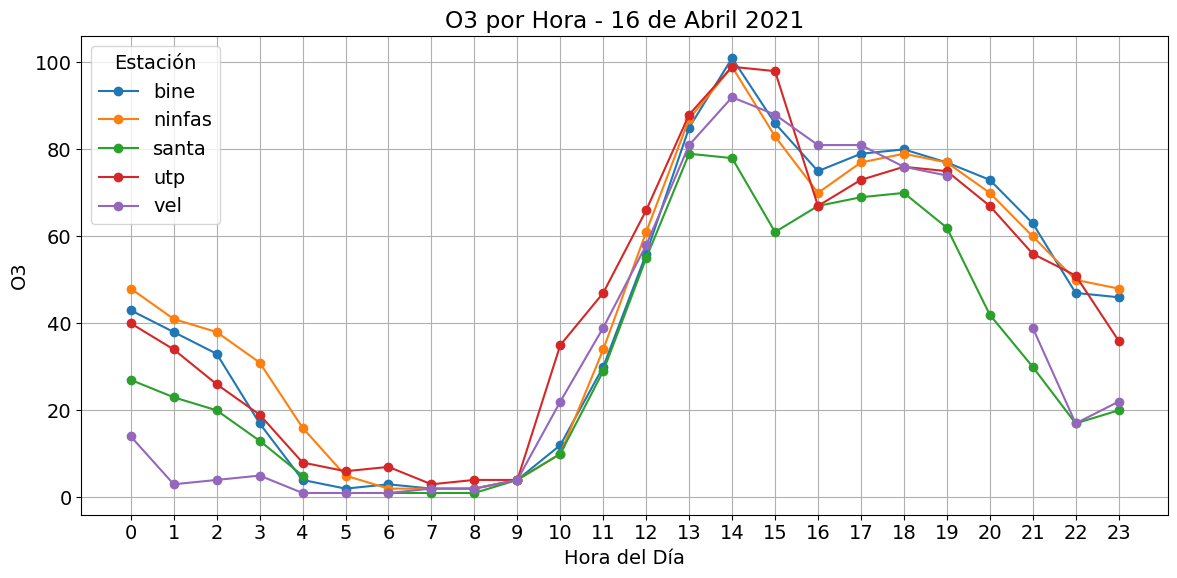

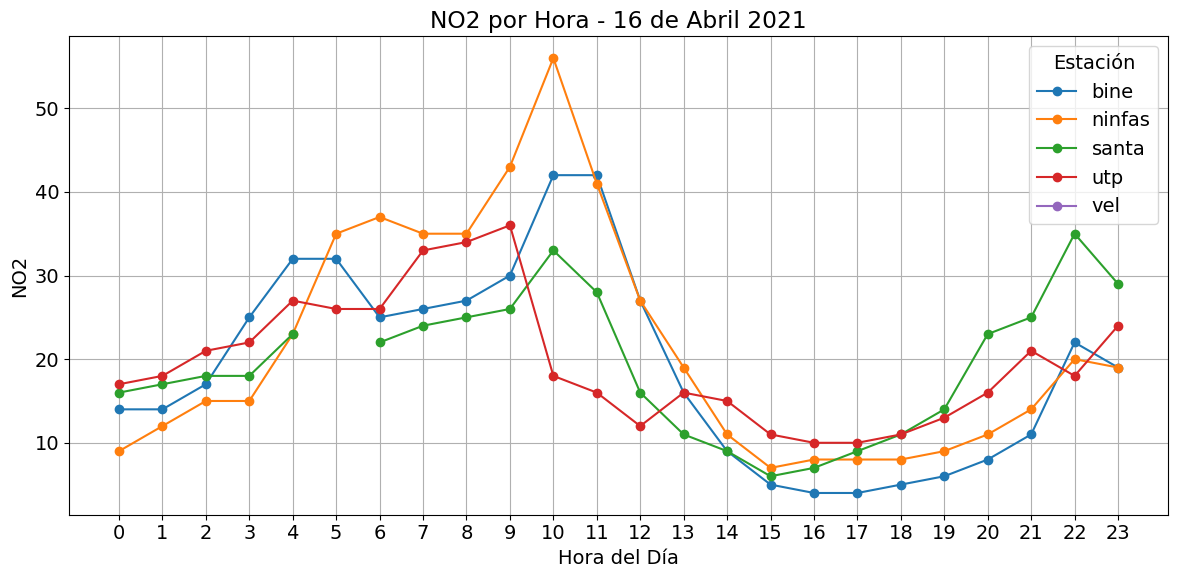

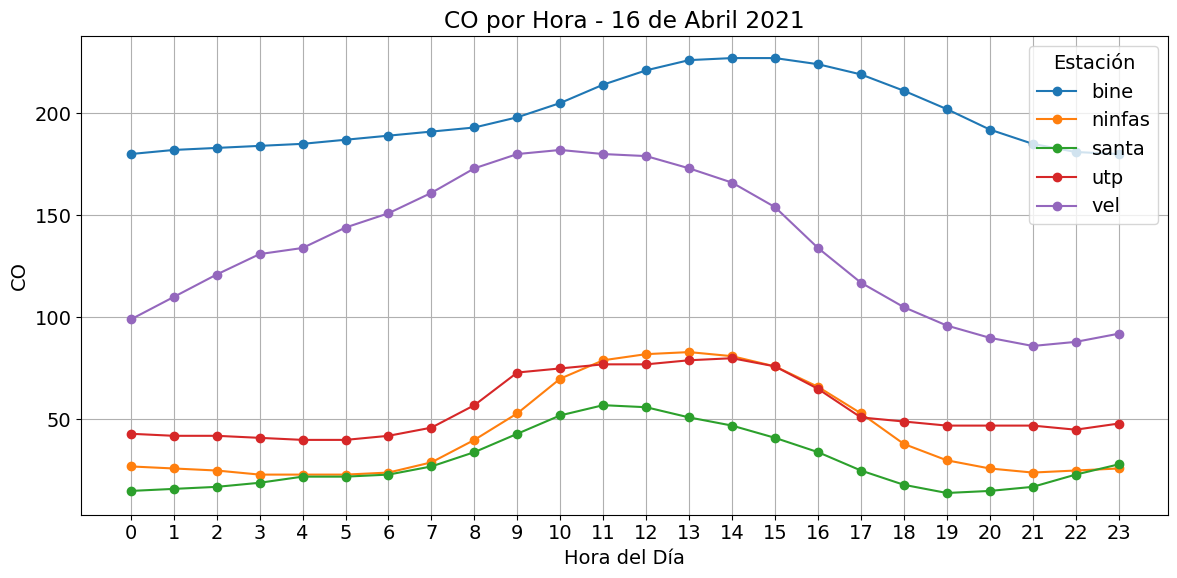

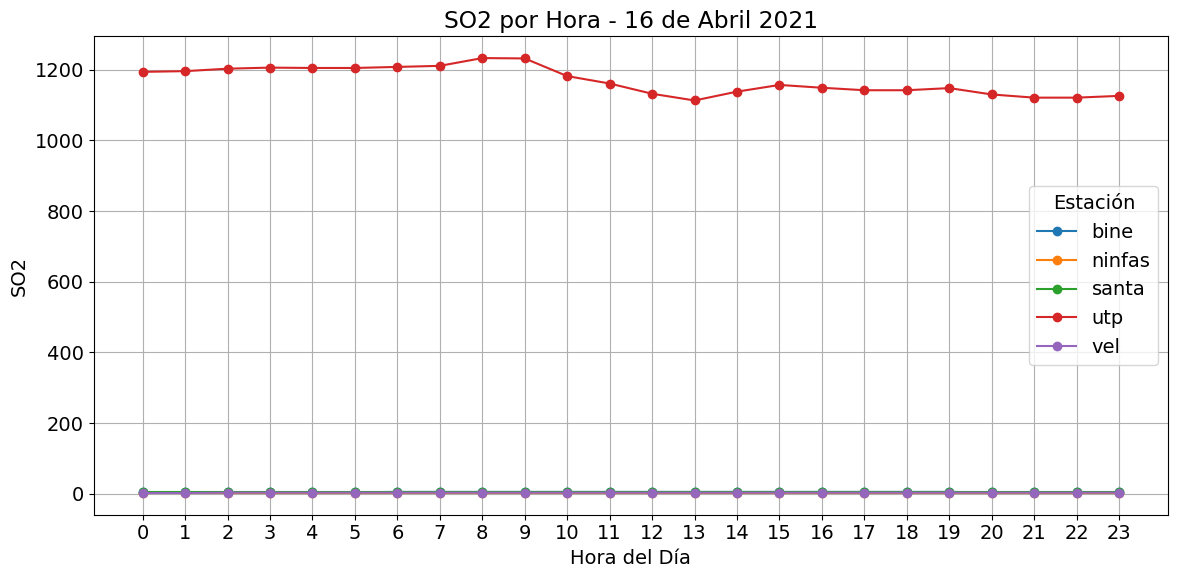

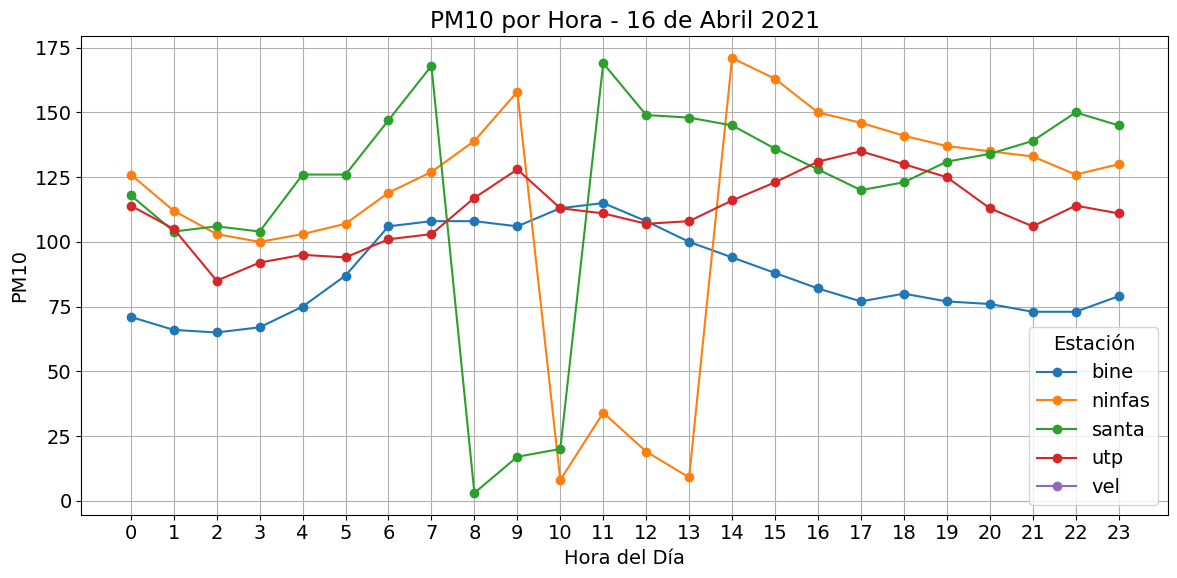

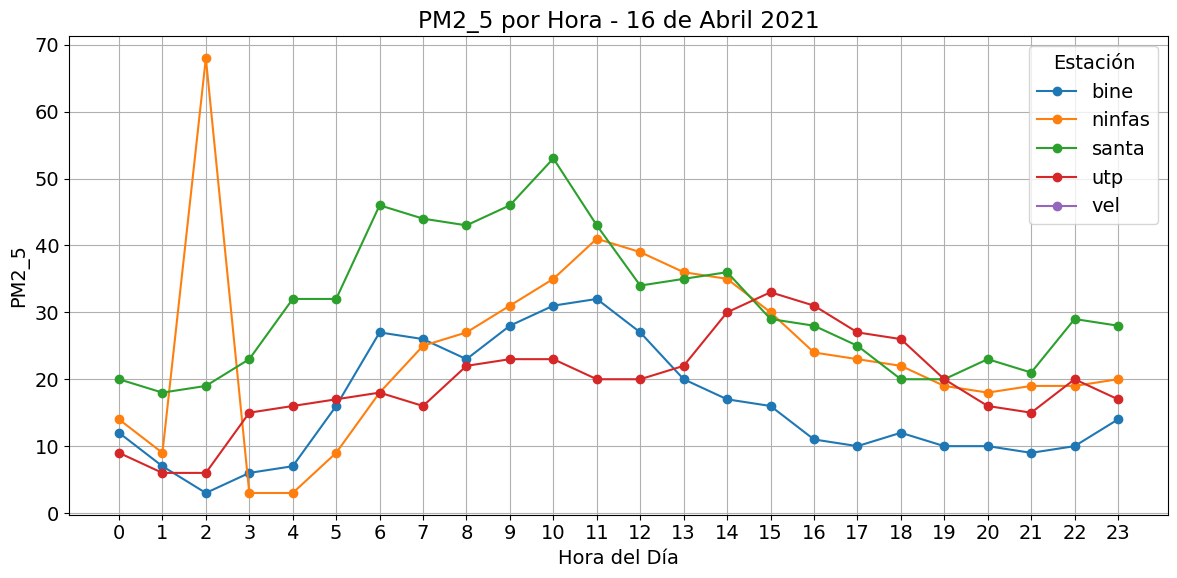

In [62]:
from datetime import datetime

# Filtrar datos del 17 de enero
selected_date = datetime(year, month, day)
df_selected_day = df[df['DateTime'].dt.date == selected_date.date()]

# Graficar evolución horaria de cada contaminante en ese día
for contaminante in contaminantes:
    plt.figure(figsize=(12, 6))
    for estacion in df_selected_day['Estacion'].unique():
        data = df_selected_day[df_selected_day['Estacion'] == estacion]
        plt.plot(data['Hora'], data[contaminante], marker='o', label=estacion)

    plt.title(f'{contaminante} por Hora - {day} de {month_name(month)} {year}')
    plt.xlabel('Hora del Día')
    plt.ylabel(contaminante)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend(title='Estación')
    plt.tight_layout()
    plt.show()

# 📊 Análisis del 17 de enero de 2023 (día crítico)

- O₃: se mantiene bajo durante todo el día, como es típico en días con alta concentración de contaminantes primarios (inversión térmica puede inhibir su formación).

- NO₂ y CO: presentan picos pronunciados en la mañana (7–10 h) y tarde (18–21 h), especialmente en vel, santa y utp, alineado con patrones de tráfico.

- SO₂: sube en la madrugada y se mantiene estable, con vel nuevamente como estación dominante.

- PM10 y PM2.5: niveles muy altos y sostenidos todo el día, sobre todo en santa y vel, superando con facilidad umbrales críticos.

Este día refleja un evento de contaminación generalizada, probablemente causado por una combinación de alta actividad urbana, condiciones meteorológicas desfavorables y fuentes fijas/móviles activas.

In [63]:
resultados = {}

for contaminante, serie in high_pollution_days.items():
    fecha_min = serie.idxmin()  # obtiene la fecha del valor mínimo
    valor_min = serie.min()     # obtiene el valor mínimo
    resultados[contaminante] = (fecha_min, valor_min)

# Mostrar los resultados
for k, v in resultados.items():
    print(f"{k}: Día con menor concentración fue {v[0]} con un valor de {v[1]}")
    if k == 'O3':
        o3 = v[0]

# Supongamos que `o3` es una fecha tipo datetime.date o Timestamp
year_clean = o3.year
month_clean = o3.month
day_clean = o3.day

print("Fecha limpia para O3:")
print(year_clean, month_clean, day_clean)


O3: Día con menor concentración fue 2021-04-08 con un valor de 31
NO2: Día con menor concentración fue 2021-12-09 con un valor de 20
CO: Día con menor concentración fue 2021-10-26 con un valor de 24
SO2: Día con menor concentración fue 2021-07-27 con un valor de 24
PM10: Día con menor concentración fue 2021-02-21 con un valor de 19
PM2_5: Día con menor concentración fue 2021-06-11 con un valor de 11
Fecha limpia para O3:
2021 4 8


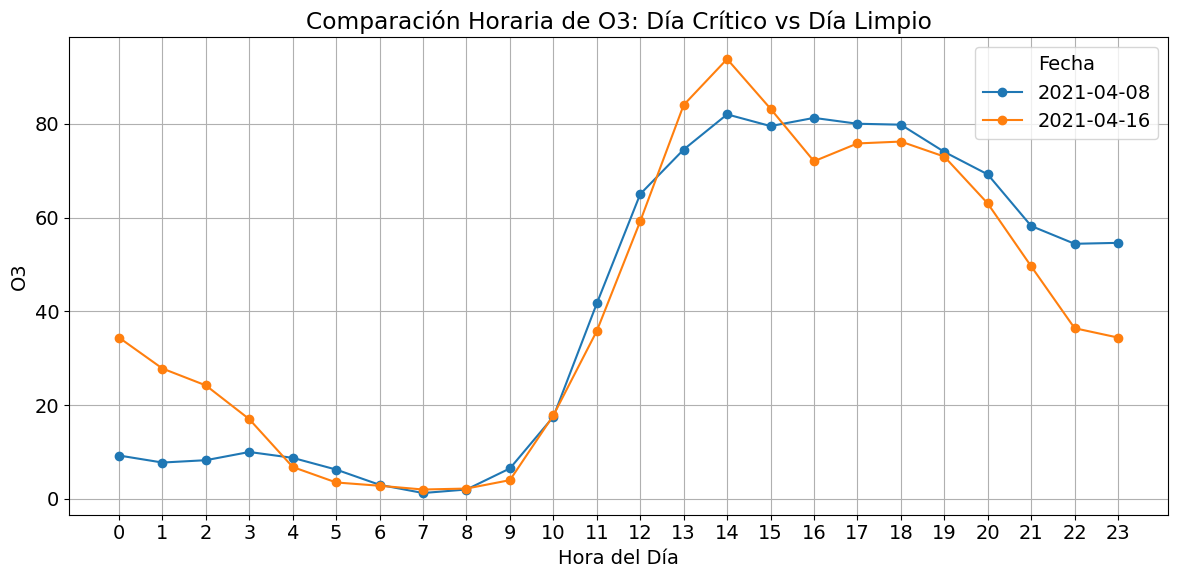

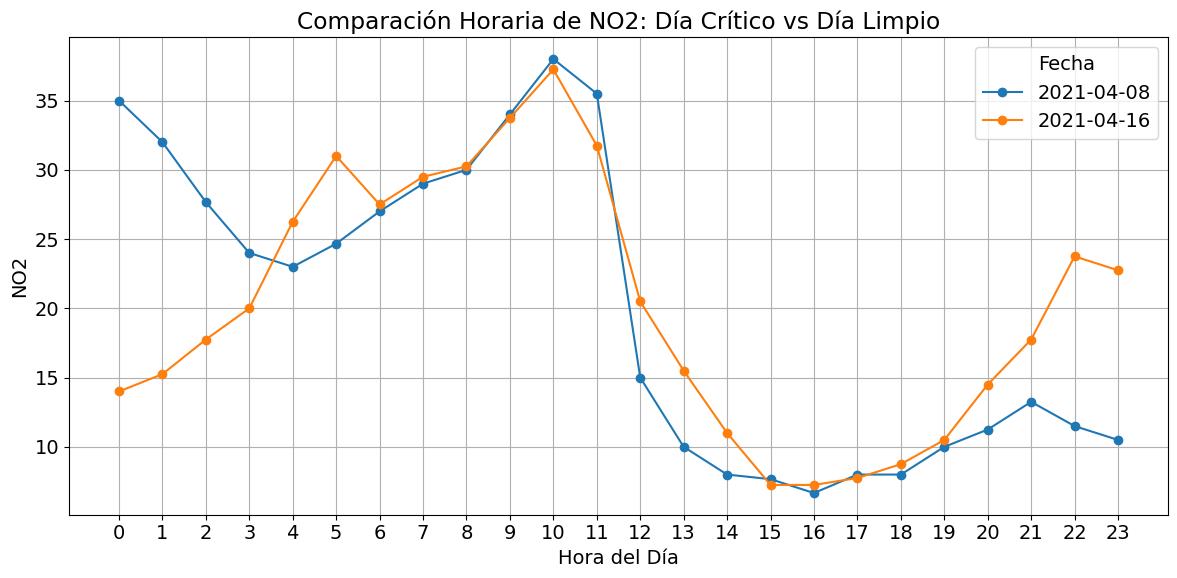

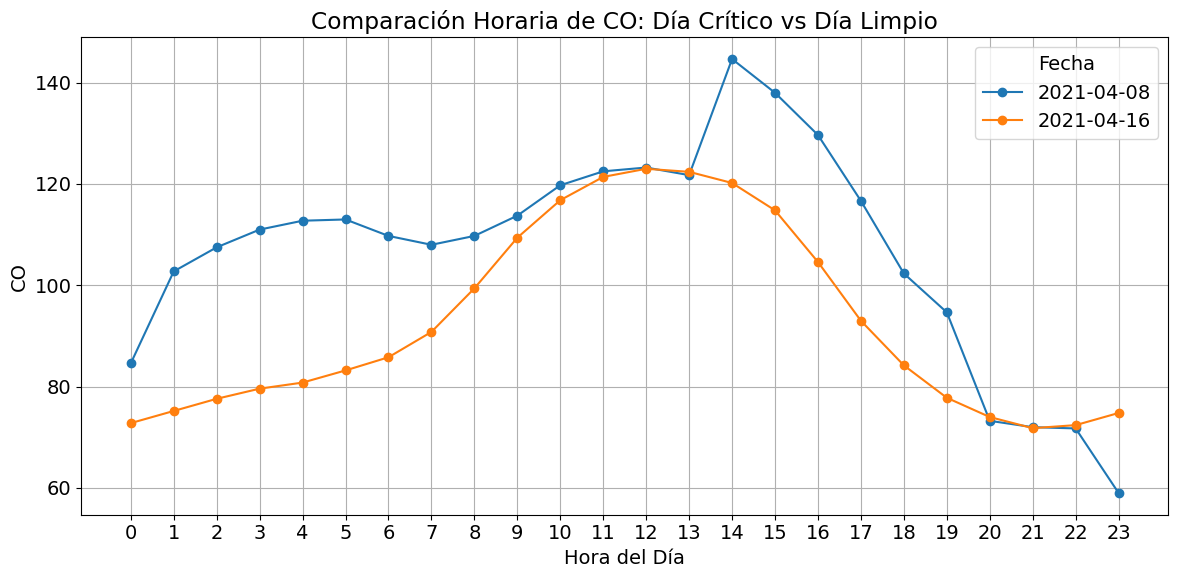

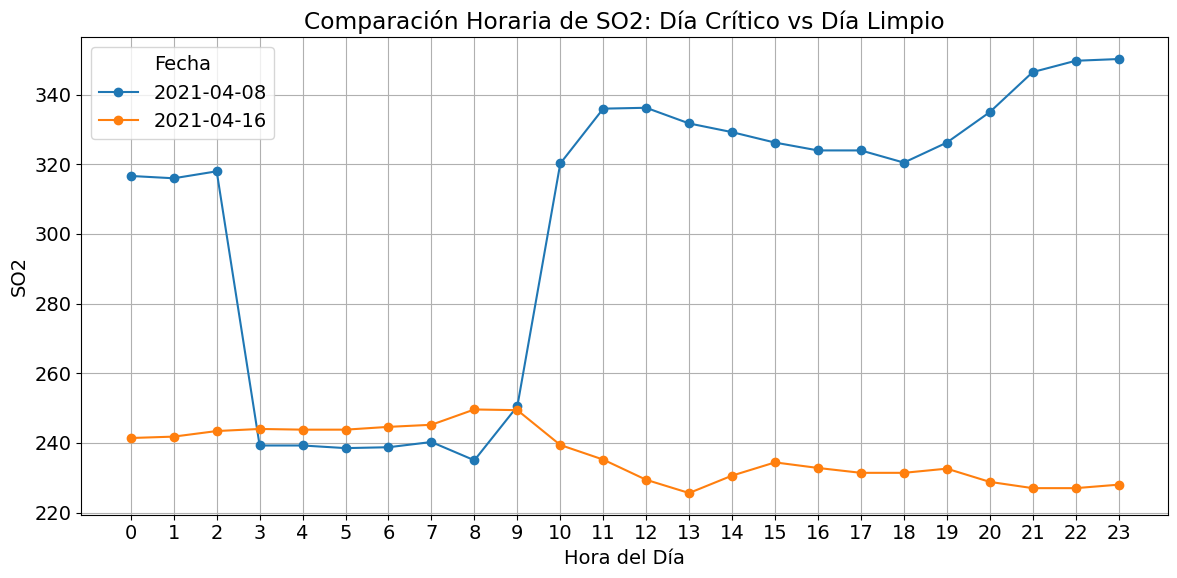

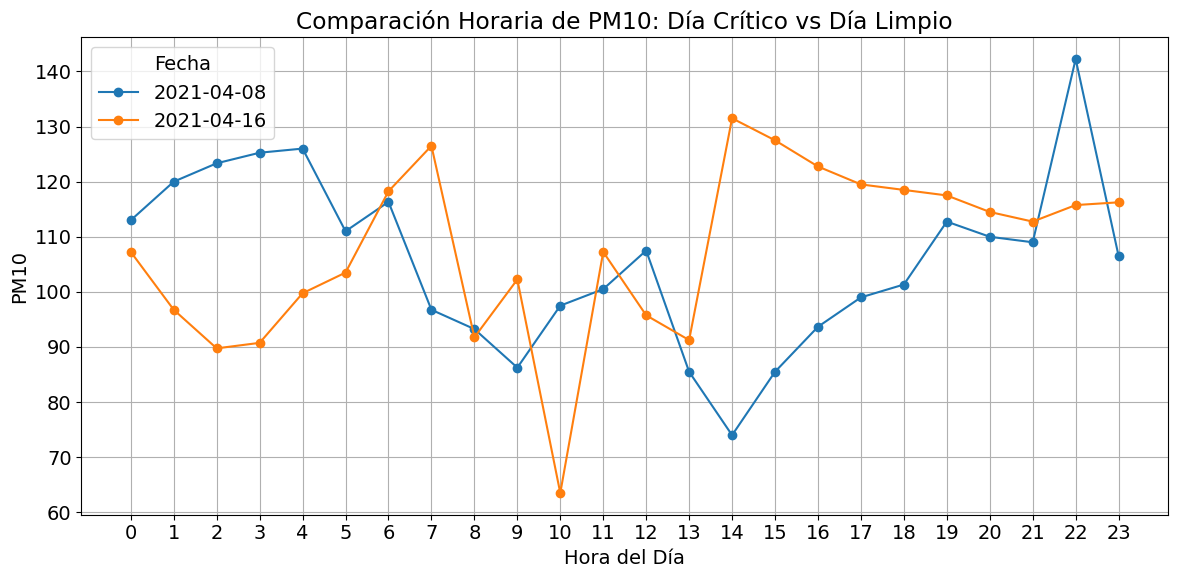

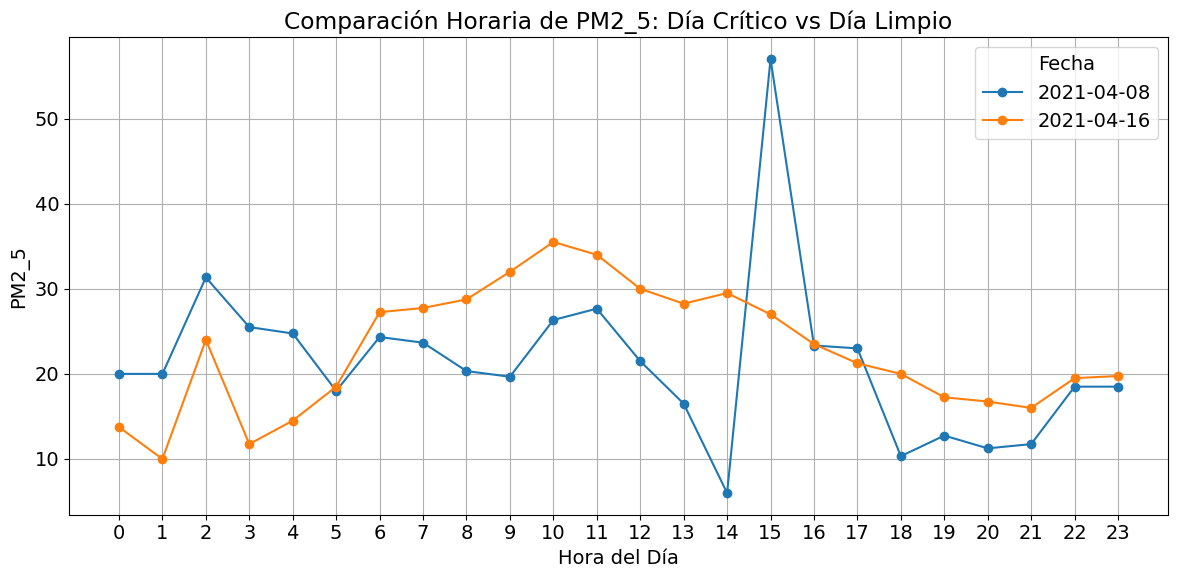

In [64]:
# Filtrar ambos días
df['Fecha'] = df['DateTime'].dt.date
comparison_days = df[df['Fecha'].isin([datetime(year, month, day).date(), datetime(year_clean, month_clean, day_clean).date()])]

# Graficar comparación para cada contaminante
for contaminante in contaminantes:
    plt.figure(figsize=(12, 6))
    for fecha in comparison_days['Fecha'].unique():
        data = comparison_days[comparison_days['Fecha'] == fecha]
        promedio_hora = data.groupby('Hora')[contaminante].mean()
        plt.plot(promedio_hora.index, promedio_hora.values, marker='o', label=str(fecha))

    plt.title(f'Comparación Horaria de {contaminante}: Día Crítico vs Día Limpio')
    plt.xlabel('Hora del Día')
    plt.ylabel(contaminante)
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.legend(title='Fecha')
    plt.tight_layout()
    plt.show()


# 📊 Comparación: 17 de enero (crítico) vs 8 de octubre (limpio)

- O₃: Más alto en el día limpio (octubre), lo cual es típico; la formación de ozono se ve inhibida en días con mucha concentración de contaminantes primarios.

- NO₂, CO, SO₂: Claramente más elevados en el día crítico, con picos definidos en las horas punta (7–10 h y 18–21 h).

- PM10 y PM2.5:

    - Día crítico: niveles altos sostenidos todo el día, especialmente en la mañana.
    - Día limpio: valores significativamente menores y más estables.

Esta comparación refuerza que el 17 de enero fue un episodio severo de contaminación multisectorial, mientras que 8 de octubre refleja condiciones normales o favorables para la calidad del aire.